# Feature Engineering and Feature Selection Exercises
This notebook contains hands-on exercises for feature engineering and feature selection using Python.
Datasets used:
- Titanic (from seaborn)
- Iris (from sklearn)
- Breast Cancer (from sklearn)


## Part 1 – Feature Engineering
### Exercise 1: Create new features from existing ones
**Dataset:** Titanic dataset (`seaborn.load_dataset('titanic')`)
 

In [126]:
import seaborn as sns
import pandas as pd
pd.options.mode.copy_on_write = True

titanic = sns.load_dataset('titanic')

###  1.1 The Titanic dataset

A list of all passengers on the last Titanic voyage.
 
**Features:**
   * survived - (0 = no, 1 = yes)
   * pclass - (1 = First class, 2 = Second class, 3 = Third class)
   * sex - ("male", "female")
   * age - Age in years
   * sibsp - Number of siblings/parents on board.
   * parch - Number of parents/kids on board.
   * fare - Ticket price

In [127]:
# 0. print the first few rows of the dataset 
print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [128]:
# 1. Create FamilySize = sibsp + parch + 1
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# 2. Create IsAlone = 1 if FamilySize == 1 else 0
titanic["is_alone"] = (titanic["family_size"] == 1).astype(int)

# 3. Convert 'sex' column into numerical format (0=female, 1=male) (Hint: use map. for example: df['col'] = df['col'].map({'a': 1, 'b': 2}))
titanic['sex_numerical'] = titanic["sex"].map({"male": 0, "female": 1})


print(titanic.head(5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  family_size  is_alone  \
0    man        True  NaN  Southampton    no  False            2         0   
1  woman       False    C    Cherbourg   yes  False            2         0   
2  woman       False  NaN  Southampton   yes   True            1         1   
3  woman       False    C  Southampton   yes  False            2         0   
4    man        True  NaN  Southampton    no   True            1         1   

   sex_numerical  
0              0  
1              1  
2              1 

### Exercise 2: Handling missing values


#### 2.1. Identify columns with missing values


In [129]:
with_missing = titanic[titanic.columns[titanic.isna().any()]]

with_missing

,age,embarked,deck,embark_town
0,22.0,S,NaN,Southampton
1,38.0,C,C,Cherbourg
2,26.0,S,NaN,Southampton
3,35.0,S,C,Southampton
4,35.0,S,NaN,Southampton
...,...,...,...,...
886,27.0,S,NaN,Southampton
887,19.0,S,B,Southampton
888,NaN,S,NaN,Southampton
889,26.0,C,C,Cherbourg



#### 2.2. Impute missing numerical values with the median

In [130]:
# Impute missing values:
#   1. missing numerical <- median: (hint: use select_dtypes(include=['number']).columns to select numerical columns. and then use fillna)

numbers_with_missing = with_missing.select_dtypes(include="number")
numbers_filled = numbers_with_missing.fillna(numbers_with_missing.median())

titanic[numbers_filled.columns] = numbers_filled

display(numbers_with_missing.median())
numbers_filled

age    28.0
dtype: float64

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0



#### 2.3. Impute missing categorical values with the mode

In [131]:

#   2.3.1 missing categorical <- mode: (hint: user select_dtypes(include=['object', 'category']).columns to select categorical columns. and then use fillna)
categorical_with_missing = with_missing.select_dtypes(include=['object', 'category'])
{
    col: categorical_with_missing[col].unique() for col in categorical_with_missing.columns
}

{'embarked': array(['S', 'C', 'Q', nan], dtype=object),
 'deck': [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
 Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
 'embark_town': array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)}

In [132]:
# 2.3.2 Add the category "MISSING" to all category columns
for column in categorical_with_missing.select_dtypes(include="category"):
    try:
        categorical_with_missing[column] = categorical_with_missing[column].cat.add_categories("MISSING")
    except ValueError:
        continue

categorical_filled = categorical_with_missing.fillna("MISSING")

titanic[categorical_with_missing.columns] = categorical_filled

categorical_filled


,embarked,deck,embark_town
0,S,MISSING,Southampton
1,C,C,Cherbourg
2,S,MISSING,Southampton
3,S,C,Southampton
4,S,MISSING,Southampton
...,...,...,...
886,S,MISSING,Southampton
887,S,B,Southampton
888,S,MISSING,Southampton
889,C,C,Cherbourg


In [133]:
#   2.3.3 Verify if there are no missing values, by checking the unique values of each column, looking for NaN values.
{
    col: titanic[col].unique() for col in list(categorical_with_missing.columns) + list(numbers_with_missing.columns)
}


{'embarked': array(['S', 'C', 'Q', 'MISSING'], dtype=object),
 'deck': ['MISSING', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
 Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'MISSING'],
 'embark_town': array(['Southampton', 'Cherbourg', 'Queenstown', 'MISSING'], dtype=object),
 'age': array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
         4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
        19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
        29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
        25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
        37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
        55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
        20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
        10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
        24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])}

### Exercise 3: Encoding categorical variables
**Dataset:** Iris dataset (`sklearn.datasets.load_iris`)

In [134]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True) # Load data as a DataFrame, where (data, target) will be pandas DataFrames or Series
iris_df = iris.data.copy()      # Features only, without inbuilt 'target' column.

iris_df['species'] = pd.Index(iris.target_names)[iris.target] # add 'species' column to iris_df using target names

display(iris_df.head())         # Display the first few rows of the iris dataset
display("Unique species names: ", iris_df['species'].unique())  # Display unique species names

# --- Encode species names using One-Hot Encoding and Label Encoding ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


'Unique species names: '

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### 3.1. Label encoding (hint: use LabelEncoder, and fit_transform)

In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

display("Before transform: ", iris_df['species'])
species_labels = le.fit_transform(iris_df['species'])
display("After transform: ", species_labels)


'Before transform: '

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

'After transform: '

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### 3.1.1 The mapping

In [136]:
id_to_name = list(enumerate(le.classes_))
display(id_to_name)

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

#### 3.2. Onehot encoding 
      

In [137]:
from sklearn.preprocessing import OneHotEncoder   

onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

species_onehot = onehot.fit_transform(iris_df[['species']], iris_df['species'])
        #  then fit_transform, 
        #  after that use et_feature_names_out(['species']).tolist() to get the one-hot encoded column names, 
        #  and then add the one-hot encoded columns to iris_df)

columns = list(map(lambda x: x[1], id_to_name))

from pandas import DataFrame
iris_df[columns] = DataFrame.from_records(species_onehot).astype(int)

iris_df[columns]

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## Part 2 – Feature Selection
### Exercise 4: Correlation-based selection
**Dataset:** Continuous with the processed Titanic dataset

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Compute correlation matrix for numerical variables

# 1. select numerical columns: (HINT you have done this before in part 1))
titanic.select_dtypes(include="number").head(5)

,survived,pclass,age,sibsp,parch,fare,family_size,is_alone,sex_numerical
0,0,3,22.0,1,0,7.2500,2,0,0
1,1,1,38.0,1,0,71.2833,2,0,1
2,1,3,26.0,0,0,7.9250,1,1,1
3,1,1,35.0,1,0,53.1000,2,0,1
4,0,3,35.0,0,0,8.0500,1,1,0


In [139]:

    # 2. compute correlation matrix (Hint: use corr(numeric_only=True) to compute correlation matrix for numerical variables
    
corr = titanic.corr(numeric_only=True)
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,family_size,is_alone,sex_numerical
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367,0.016639,-0.203367,0.543351
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207,0.065997,0.135207,-0.131900
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647,-0.245619,0.171647,-0.081163
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471,0.890712,-0.584471,0.114631
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398,0.783111,-0.583398,0.245489
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.217138,-0.271832,0.182333
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744,-0.348143,0.404744,-0.908578
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-0.690922,1.000000,-0.303646
family_size,0.016639,0.065997,-0.245619,0.890712,0.783111,0.217138,-0.348143,-0.690922,1.000000,-0.690922,0.200988
is_alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-0.690922,1.000000,-0.303646


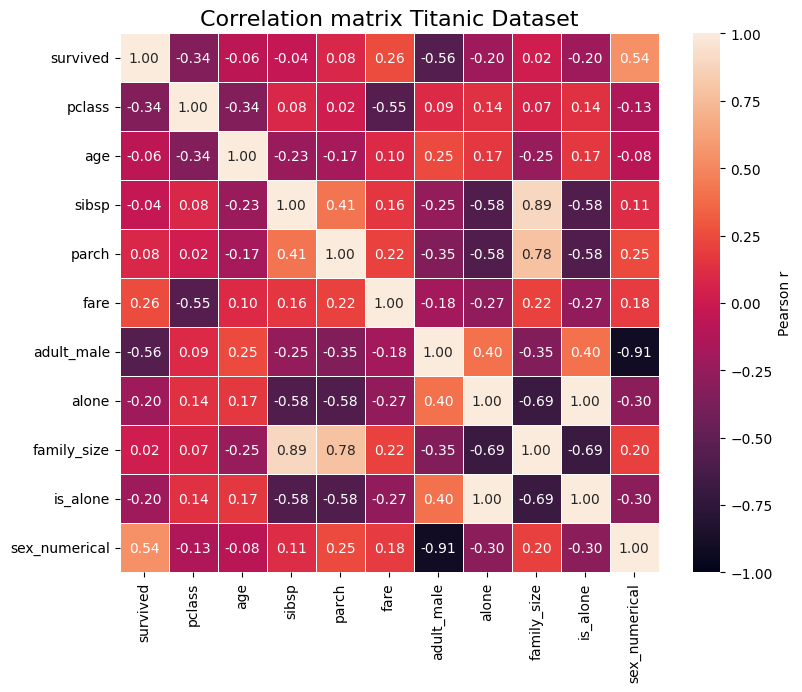

In [140]:

# 3. (optional) Plot matrix 
        # (HINT: uncomment the following lines to plot the correlation matrix.
        #  Remember to import seaborn and matplotlib.pyplot and replace 'corr' by your correlation matrix variable name)
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, square=True,
             linewidths=0.5, cbar_kws={"label": "Pearson r"})
plt.title("Correlation matrix Titanic Dataset", fontsize=16)
plt.show()

In [141]:

    # 4. Drop variables with high correlation (>0.85)
threshhold = 0.85 
keep_fea = []   # features we keep
drop_fea = []   # features to drop

        # (HINT: use for loop to iterate over the columns of the correlation matrix, 
        #   for example: 
for col in corr.columns:

    any_correlation_above_treshhold = False
    for row in keep_fea:
        if corr.loc[col, row] > threshhold:
            drop_fea.append(col)
            any_correlation_above_treshhold = True
            break

    if not any_correlation_above_treshhold:
        keep_fea.append(col)

keep_fea, drop_fea

(['survived',
  'pclass',
  'age',
  'sibsp',
  'parch',
  'fare',
  'adult_male',
  'alone',
  'sex_numerical'],
 ['family_size', 'is_alone'])

In [142]:

#   5. (optional) if you want to create a reduced dataset with dropped features: (uncomment the following line)
before = len(titanic.columns)
titanic_reduced = titanic.drop(columns=drop_fea)
after = len(titanic_reduced.columns)

print(f"The number of columns dropped: {after-before}")

The number of columns dropped: -2


### Exercise 5: Univariate feature selection
**Dataset:** Breast Cancer dataset (`sklearn.datasets.load_breast_cancer`)

In [143]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

    # 1. Train/test split (HINT: use train_test_split from sklearn.model_selection)
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X_train:")
display(X_train)
print("X_test:")
X_test


X_train:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
404,12.340,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.1048,0.06744,0.04921,0.04793,0.2298,0.05974
179,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,0.06133,...,13.630,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.020690,0.1834,0.05934,...,12.970,22.46,83.12,508.9,0.1183,0.10490,0.08105,0.06544,0.2740,0.06487
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,...,12.260,19.68,78.78,457.8,0.1345,0.21180,0.17970,0.06918,0.2329,0.08134
432,20.180,19.54,133.80,1250.0,0.11330,0.14890,0.213300,0.125900,0.1724,0.06053,...,22.030,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,12.680,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,...,17.090,33.47,111.80,888.3,0.1851,0.40610,0.40240,0.17160,0.3383,0.10310
346,12.060,18.90,76.66,445.3,0.08386,0.05794,0.007510,0.008488,0.1555,0.06048,...,13.640,27.06,86.54,562.6,0.1289,0.13520,0.04506,0.05093,0.2880,0.08083
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,...,12.570,26.48,79.57,489.5,0.1356,0.10000,0.08803,0.04306,0.3200,0.06576
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206


X_test:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
205,15.120,16.68,98.78,716.6,0.08876,0.09588,0.075500,0.040790,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.332700,0.125200,0.3415,0.09740
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.14520,0.23380,0.168800,0.081940,0.2268,0.09082
455,13.380,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.11720,0.14210,0.070030,0.077630,0.2196,0.07675
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,...,25.68,32.07,168.20,2022.0,0.13680,0.31010,0.439900,0.228000,0.2268,0.07425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,14.400,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,0.1707,0.05433,...,15.40,31.98,100.40,734.6,0.10170,0.14600,0.147200,0.055630,0.2345,0.06464
178,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,0.08046,...,10.31,22.65,65.50,324.7,0.14820,0.43650,1.252000,0.175000,0.4228,0.11750
403,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.083880,0.3297,0.07834


In [144]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression


    # 2. Select top 5 features 
        # (hint: using SelectKBest(score_func=f_classif, k=5) , and then fit it to the training data. 
        #  After that, use get_support() to get a boolean mask of selected features, and then use it to get the feature names from X.columns)
    
kbest = SelectKBest(score_func=f_classif, k=5)

fit = kbest.fit(X_train, y_train)
fit.get_feature_names_out()


array(['mean perimeter', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'], dtype=object)

In [145]:

# 3. make training dataset based on the selected features: 

fit_columns = X_train.columns[fit.get_support()]
X_train_kbest = X_train[fit_columns]
X_test_kbest = X_test[fit_columns]
X_train_kbest

,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
404,78.29,0.020540,13.180,84.11,0.04793
179,81.29,0.013300,13.630,86.70,0.03990
251,73.28,0.020690,12.970,83.12,0.06544
540,74.65,0.025940,12.260,78.78,0.06918
432,133.80,0.125900,22.030,146.00,0.21730
...,...,...,...,...,...
64,82.69,0.068730,17.090,111.80,0.17160
346,76.66,0.008488,13.640,86.54,0.05093
188,75.27,0.015530,12.570,79.57,0.04306
412,59.75,0.005128,9.965,66.61,0.02564


In [146]:

# 4. (optional) Training a Logistic Regression model with selected features

        # HINT: Since we have not talked about the algorithms, it is possible for you to use the code provided below:
clf_5 = LogisticRegression(max_iter=100, # max_iter is increased to ensure convergence
                          solver="liblinear"  # use liblinear for small datasets
                        )
clf_5.fit(X_train_kbest, y_train)
y_pred = clf_5.predict(X_test_kbest)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9300699300699301


### Exercise 6: Recursive Feature Elimination (RFE)

In [147]:
from sklearn.feature_selection import RFE

# 1. Use RFE with logistic regression to select top 7 features 
        # (Hint: use RFE(estimator=clf_5, n_features_to_select=7, step=1), 
        # then fit it to the training data, 
        # and then use X.columns[rfe.support_].tolist() to get the selected features)
rfe = RFE(estimator=clf_5, n_features_to_select=7, step=1)

fit = rfe.fit(X_train, y_train)
fit.get_feature_names_out()

array(['mean radius', 'mean concavity', 'mean concave points',
       'perimeter error', 'worst radius', 'worst concavity',
       'worst concave points'], dtype=object)

In [148]:

    # 2. Make training dataset based on the selected 7 features
X_train_krfe = X_train[fit.get_feature_names_out()]
X_test_krfe = X_test[fit.get_feature_names_out()]
X_train_krfe


,mean radius,mean concavity,mean concave points,perimeter error,worst radius,worst concavity,worst concave points
404,12.340,0.021090,0.020540,2.602,13.180,0.04921,0.04793
179,12.810,0.009193,0.013300,1.778,13.630,0.02758,0.03990
251,11.500,0.026380,0.020690,2.684,12.970,0.08105,0.06544
540,11.540,0.067370,0.025940,1.628,12.260,0.17970,0.06918
432,20.180,0.213300,0.125900,3.008,22.030,0.53080,0.21730
...,...,...,...,...,...,...,...
64,12.680,0.112800,0.068730,2.927,17.090,0.40240,0.17160
346,12.060,0.007510,0.008488,1.559,13.640,0.04506,0.05093
188,11.810,0.023530,0.015530,1.011,12.570,0.08803,0.04306
412,9.397,0.037350,0.005128,1.174,9.965,0.18680,0.02564


In [149]:

    # 3. Train new model on selected features and Compare accuracy with and without RFE. What the accuracy difference?
        # (HINT, uncomment the following lines to train a new model and compare accuracy with the previous model)---
clf_7 = LogisticRegression(max_iter=100,
                            solver="liblinear")
clf_7.fit(X_train_krfe, y_train)
y_pred_7 = clf_7.predict(X_test_krfe)
print("Accuracy:", accuracy_score(y_test, y_pred_7))


Accuracy: 0.9230769230769231
